In [1]:
import os
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset, Dataset, DatasetBuilder
import matplotlib.pyplot as plt 

In [2]:
load_dotenv(override=True)
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

In [3]:
login(os.environ['HF_TOKEN'],add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", f"raw_meta_Appliances", split='full', trust_remote_code=True)

In [5]:
len(dataset)

94327

In [6]:
sample = dataset[2]

In [7]:
sample

{'main_category': 'Tools & Home Improvement',
 'title': 'Clothes Dryer Drum Slide, General Electric, Hotpoint, WE1M333, WE1M504',
 'average_rating': 3.5,
 'rating_number': 18,
 'features': [],
 'description': ['Brand new dryer drum slide, replaces General Electric, Hotpoint, RCA, WE1M333, WE1M504.'],
 'price': 'None',
 'images': {'hi_res': ['https://m.media-amazon.com/images/I/51TIpnkrEpL._AC_SL1500_.jpg'],
  'large': ['https://m.media-amazon.com/images/I/21HQKcHPIkL._AC_.jpg'],
  'thumb': ['https://m.media-amazon.com/images/I/21HQKcHPIkL._AC_US75_.jpg'],
  'variant': ['MAIN']},
 'videos': {'title': [], 'url': [], 'user_id': []},
 'store': 'GE',
 'categories': ['Appliances', 'Parts & Accessories'],
 'details': '{"Manufacturer": "RPI", "Part Number": "WE1M333,", "Item Weight": "0.352 ounces", "Package Dimensions": "5.5 x 4.7 x 0.4 inches", "Item model number": "WE1M333,", "Is Discontinued By Manufacturer": "No", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Requi

In [8]:
print(sample['title'])
print(sample['description'])
print(sample['features'])
print(sample['details'])
print(sample['price'])


Clothes Dryer Drum Slide, General Electric, Hotpoint, WE1M333, WE1M504
['Brand new dryer drum slide, replaces General Electric, Hotpoint, RCA, WE1M333, WE1M504.']
[]
{"Manufacturer": "RPI", "Part Number": "WE1M333,", "Item Weight": "0.352 ounces", "Package Dimensions": "5.5 x 4.7 x 0.4 inches", "Item model number": "WE1M333,", "Is Discontinued By Manufacturer": "No", "Item Package Quantity": "1", "Batteries Included?": "No", "Batteries Required?": "No", "Best Sellers Rank": {"Tools & Home Improvement": 1315213, "Parts & Accessories": 181194}, "Date First Available": "February 25, 2014"}
None


In [9]:
not_none_prices_data = [float(price) for price in dataset['price'] if price != 'None']
percentage_not_none = len(not_none_prices_data)/len(dataset) * 100
print(f"{percentage_not_none: .1f} of the dataset does not have None price")

 49.5 of the dataset does not have None price


In [10]:
content = [data['title'] + str(data['description']) + str(data['features']) +str (data['details']) + data['price'] for data in dataset if data['price'] != None]

In [11]:
lengths = [len(data['title'] + str(data['description']) + str(data['features']) +str (data['details']) + data['price']) for data in dataset if data['price'] != None]

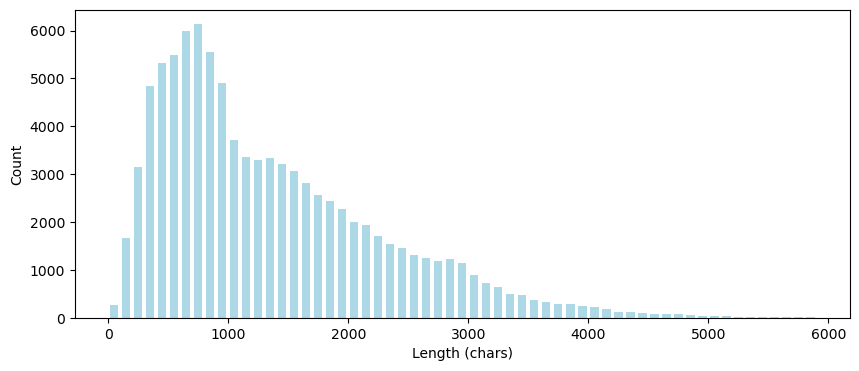

In [16]:
plt.figure(figsize=(10,4))
plt.hist(lengths, rwidth=0.7, color="lightblue", bins=range(0, 6000, 100))
plt.xlabel('Length (chars)')
plt.ylabel('Count')
plt.show()


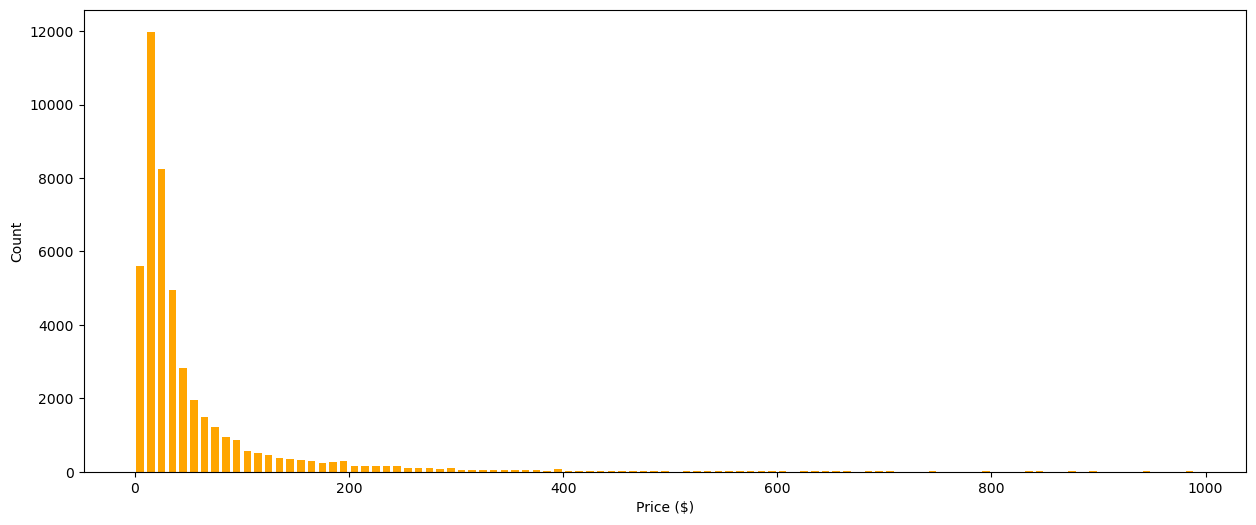

In [17]:
plt.figure(figsize=(15, 6))
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.hist(not_none_prices_data, rwidth=0.7, color="orange", bins=range(0, 1000, 10))
plt.show()

In [24]:

from items import Item
items = []
for datapoint in dataset:
    try:
        price = float(datapoint["price"])
        if price > 0:
            item = Item(datapoint, price)
            if item.include:
                items.append(item)
    except ValueError as e:
        pass

print(f"There are {len(items):,} items")

There are 29,191 items


In [25]:
items

[<WD12X10327 Rack Roller and stud assembly Kit (4 Pack) by AMI PARTS Replaces AP4980629 PS3486910 1811003 = $8.99>,
 <WP67003405 67003405 Door Pivot Block - Compatible Kenmore KitchenAid Maytag Whirlpool Refrigerator - Replaces AP6010352 8208254 PS11743531 - Quick DIY Repair Solution = $16.52>,
 <Chenhon Fridge Handle Cover-Catches Drips,Door Cloth Protector,(1 Pair) (Green) = $8.89>,
 <MLGB Stainless Steel Brushed Pattern Dishwasher Magnet Cover Panel Decal Home Appliance Art, Stainless Steel Fridge Door Cover Decals Magnetic, Black, Mobile Magnetic 23" x 26" = $38.99>,
 <Homa Yellow Flower Bouquet Floral Dishwasher Magnet，Green Border Accent with Lemons Sticker Refrigerator Magnetic Cover Panel Decal 23 W x 17 H = $34.99>,
 <349241T Dryer Drum Roller Kit Whirlpool Kenmore Amana AP3098345 PS347627 Support Part Replacement 110.62832101 110.71402310 WED4815EW0 WED4815EW1 WED49STBW1 WED7000DW0 MEDC465HW0 RED4516FW0 RED4640YQ1 = $7.95>,
 <SAMSUNG DA97-11092B Genuine OEM Ice Maker Assembly

In [26]:
print(items[0])

<WD12X10327 Rack Roller and stud assembly Kit (4 Pack) by AMI PARTS Replaces AP4980629 PS3486910 1811003 = $8.99>


In [27]:
print(items[1000].test_prompt())

How much does this cost to the nearest dollar?

GE 18 Energy Star Portable Dishwasher with 8 Place Settings Autosense Cycle Pocket Handle and 53 dBA in Stainless Steel
GE Appliances is your home for the best kitchen appliances, home products, parts and accessories, and support. Autosense Cycle Piranha Hard Food Disposer Sanitize option (NSF Certified) Dimensions 36 H x 18 W x 25 3/8 D Autosense Cycle A beam of light measures soil levels and water temperature to adjust to the ideal cycle time Sanitize option (NSF Certified) High-temperature rinse sanitizes and reduces by the bacteria found on dishes Piranha Hard Food Disposer To ensure consistently clean items, this stainless steel blade rotates at 3,600 RPM to pulverize food particles and helps to prevent large particles from

Price is $


In [30]:
print(items[1000])

<GE GPT145SSLSS 18" Energy Star Portable Dishwasher with 8 Place Settings Autosense Cycle Pocket Handle and 53 dBA in Stainless Steel = $799.0>
